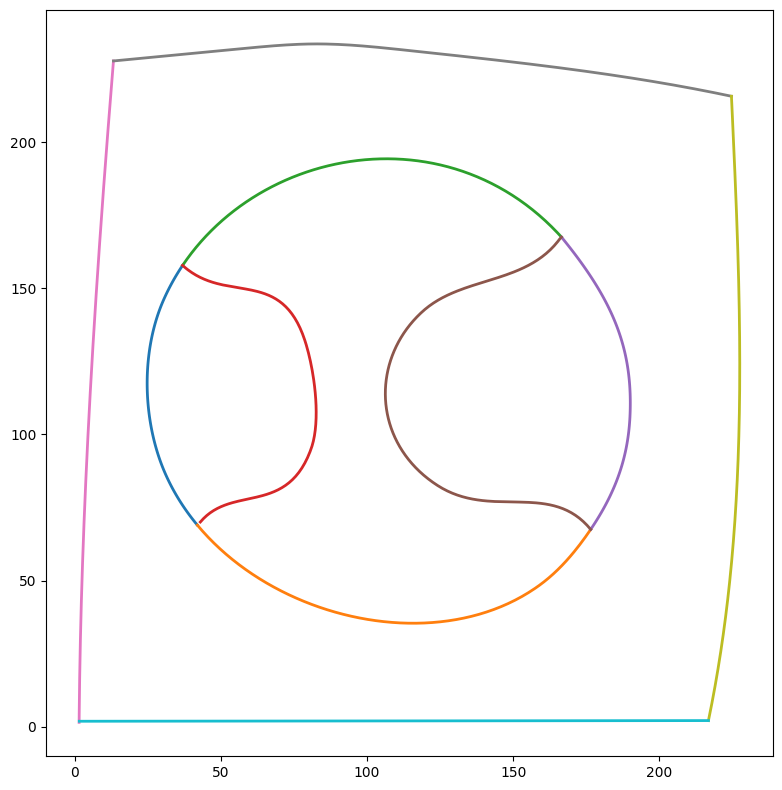

In [43]:
import numpy as np
import matplotlib.pyplot as plt


def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=",")
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs


def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2)
    ax.set_aspect("equal")
    plt.show()


# Example usage
csv_path = "./frag0.csv"  # Update with the correct path to your CSV file
paths_XYs = read_csv(csv_path)
plot(paths_XYs)

In [14]:
from skimage.measure import EllipseModel
import matplotlib.pyplot as plt

def fit_ellipse(XY, plot=False):
    model = EllipseModel()
    model.estimate(XY)
    xc, yc, a, b, theta = model.params
    
    if plot:
        theta_vals = np.linspace(0, 2 * np.pi, 100)
        ellipse_x = xc + a * np.cos(theta_vals) * np.cos(theta) - b * np.sin(theta_vals) * np.sin(theta)
        ellipse_y = yc + a * np.cos(theta_vals) * np.sin(theta) + b * np.sin(theta_vals) * np.cos(theta)
        
        plt.figure()
        plt.plot(XY[:, 0], XY[:, 1], 'o', label='Data Points')
        plt.plot(ellipse_x, ellipse_y, 'green', label='Fitted Ellipse')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend()
        plt.title("Detected Ellipse")
        plt.show()
    
    return (xc, yc), (a, b), theta

# Example usage
for path in paths_XYs:
    for XY in path:
        center, axes, angle = fit_ellipse(XY, plot=True)
        print(f"Detected ellipse with center: {center}, axes: {axes}, angle: {angle}")


ModuleNotFoundError: No module named 'skimage'

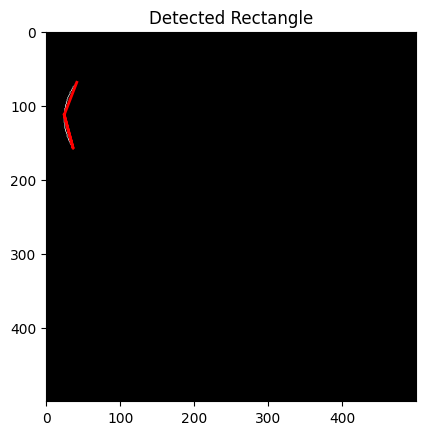

Detected rectangle with vertices: [[[ 41  68]]

 [[ 24 112]]

 [[ 36 157]]

 [[ 24 112]]]


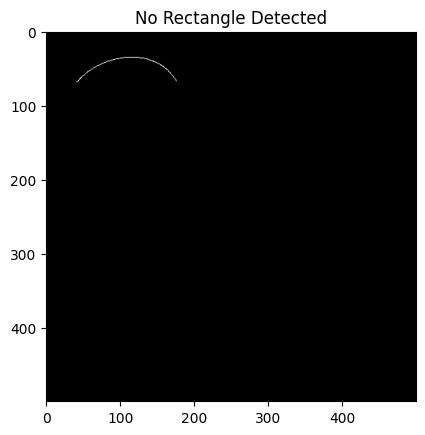

Detected rectangle with vertices: None


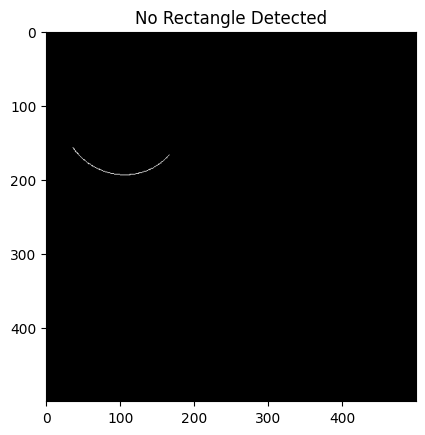

Detected rectangle with vertices: None


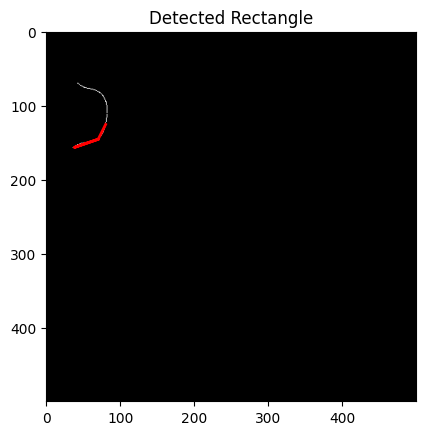

Detected rectangle with vertices: [[[ 80 125]]

 [[ 70 145]]

 [[ 38 156]]

 [[ 70 145]]]


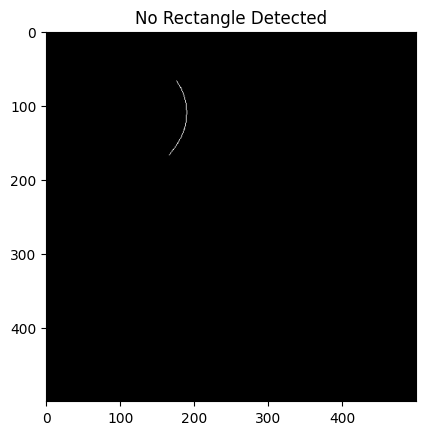

Detected rectangle with vertices: None


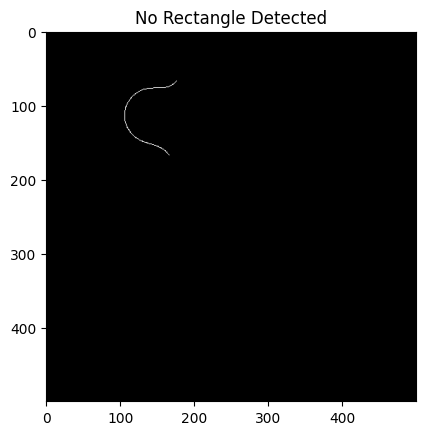

Detected rectangle with vertices: None


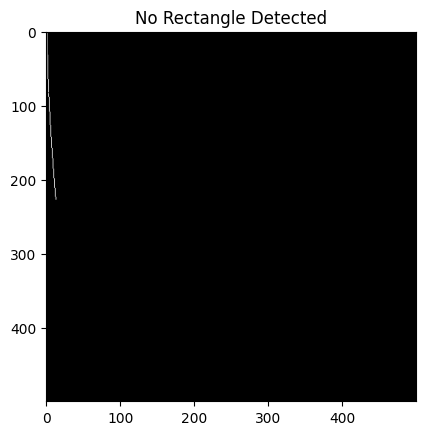

Detected rectangle with vertices: None


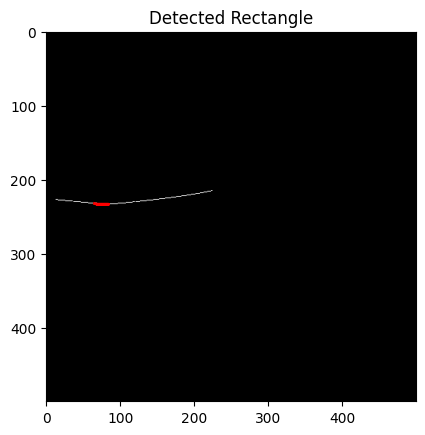

Detected rectangle with vertices: [[[ 65 232]]

 [[ 69 233]]

 [[ 84 233]]

 [[ 69 233]]]


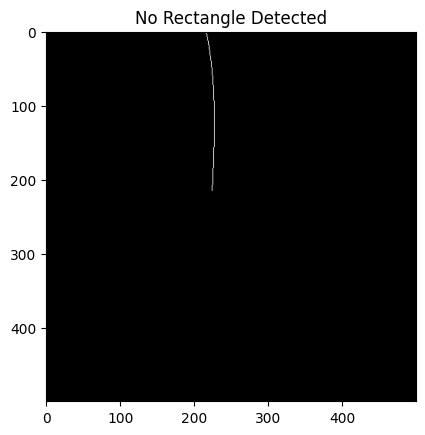

Detected rectangle with vertices: None


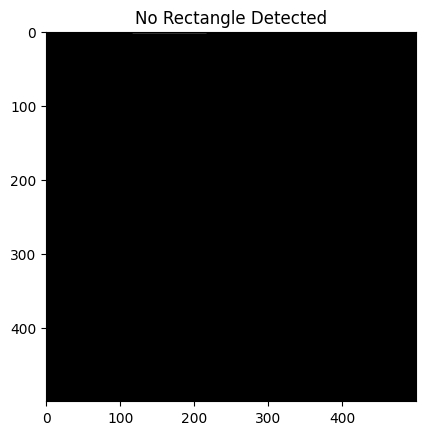

Detected rectangle with vertices: None


In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fit_rectangle(XY, plot=False):
    img = np.zeros((500, 500), dtype=np.uint8)
    for x, y in XY:
        img[int(y), int(x)] = 255
    
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangle = None
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            rectangle = approx
            break
    
    if plot:
        plt.imshow(img, cmap='gray')
        if rectangle is not None:
            plt.plot(*zip(*rectangle.squeeze()), 'r-', linewidth=2)
            plt.title("Detected Rectangle")
        else:
            plt.title("No Rectangle Detected")
        plt.show()

    return rectangle

# Example usage
for path in paths_XYs:
    for XY in path:
        rectangle = fit_rectangle(XY, plot=True)
        print(f"Detected rectangle with vertices: {rectangle}")


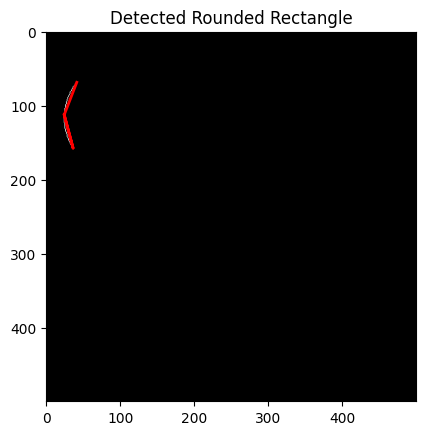

Detected rounded rectangle with vertices: [[[ 41  68]]

 [[ 24 112]]

 [[ 36 157]]

 [[ 24 112]]]


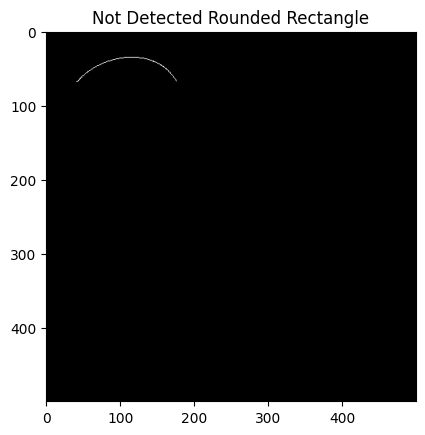

Detected rounded rectangle with vertices: None


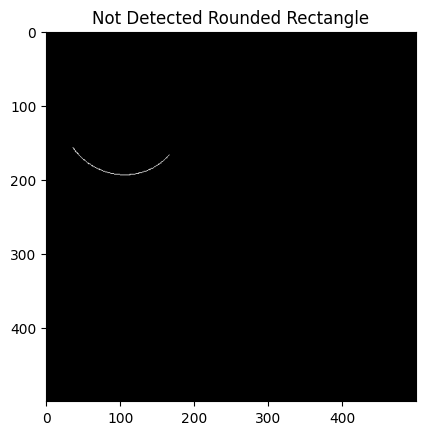

Detected rounded rectangle with vertices: None


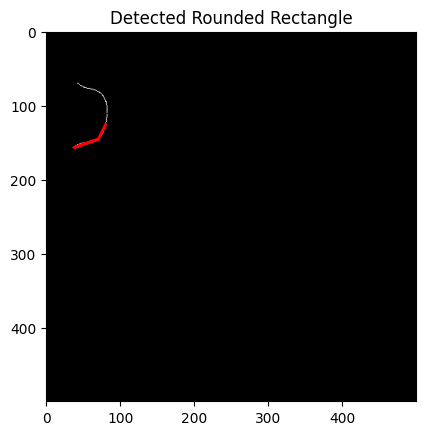

Detected rounded rectangle with vertices: [[[ 80 125]]

 [[ 70 145]]

 [[ 38 156]]

 [[ 70 145]]]


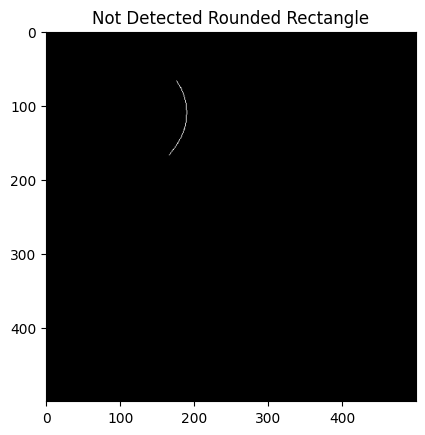

Detected rounded rectangle with vertices: None


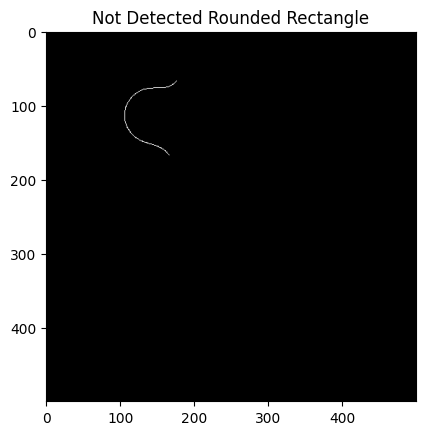

Detected rounded rectangle with vertices: None


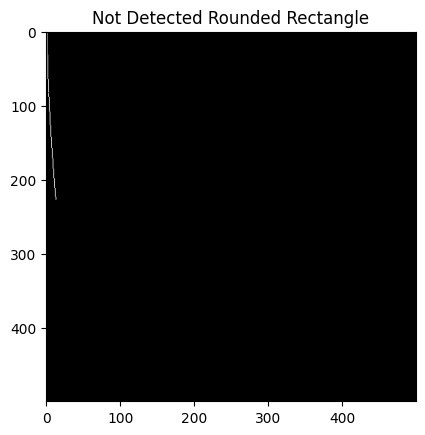

Detected rounded rectangle with vertices: None


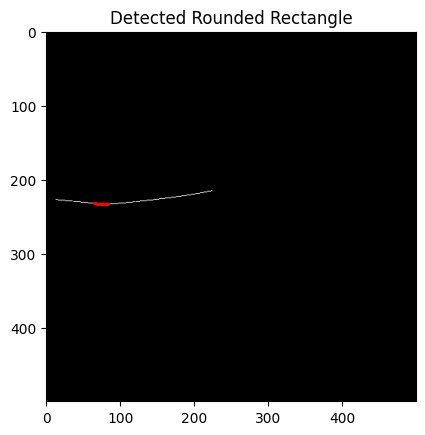

Detected rounded rectangle with vertices: [[[ 65 232]]

 [[ 69 233]]

 [[ 84 233]]

 [[ 69 233]]]


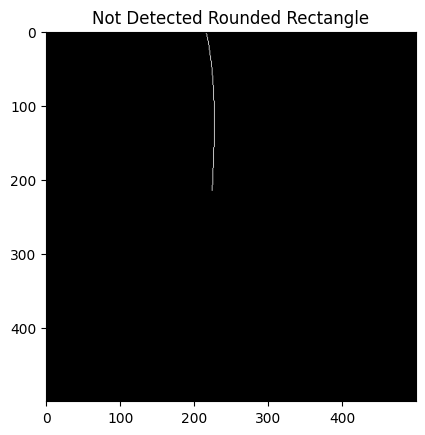

Detected rounded rectangle with vertices: None


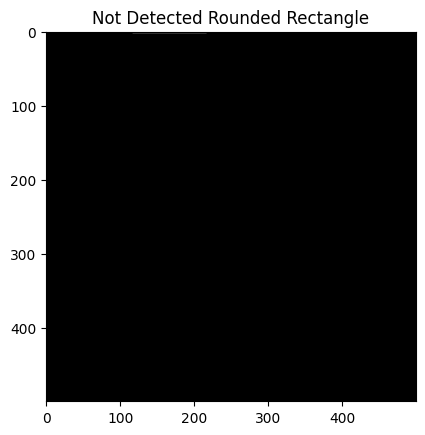

Detected rounded rectangle with vertices: None


In [45]:
def fit_rounded_rectangle(XY, plot=False):
    rectangle = fit_rectangle(XY, plot=False)
    img = np.zeros((500, 500), dtype=np.uint8)
    for x, y in XY:
        img[int(y), int(x)] = 255
    
    # Check for rounded corners (this would require further implementation)
    
    if plot:
        plt.imshow(img, cmap='gray')
        if rectangle is not None:
            plt.plot(*zip(*rectangle.squeeze()), 'r-', linewidth=2)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.title("Detected Rounded Rectangle")
        else:
            plt.title("Not Detected Rounded Rectangle")
        plt.show()

    return rectangle

# Example usage
for path in paths_XYs:
    for XY in path:
        rounded_rectangle = fit_rounded_rectangle(XY, plot=True)
        print(f"Detected rounded rectangle with vertices: {rounded_rectangle}")


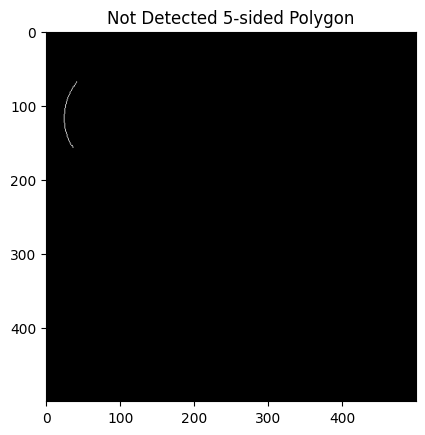

Detected polygon with vertices: None


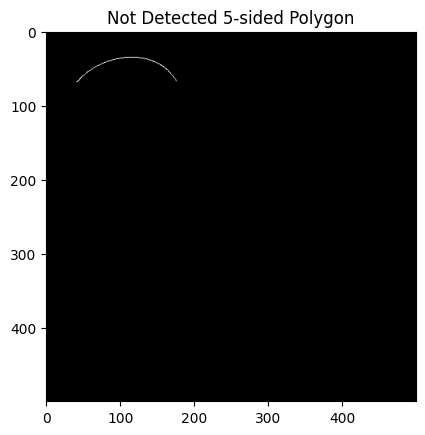

Detected polygon with vertices: None


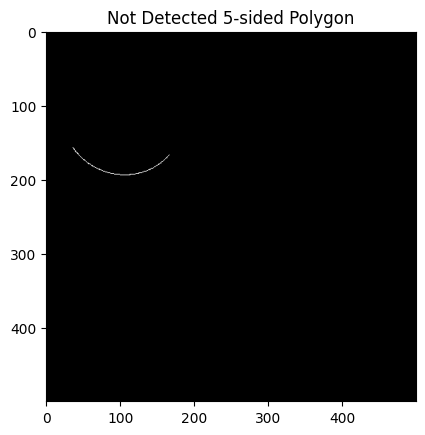

Detected polygon with vertices: None


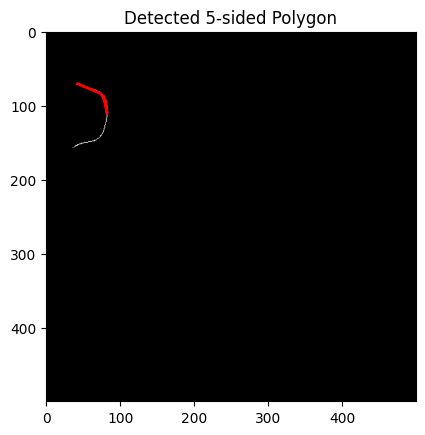

Detected polygon with vertices: [[[ 42  70]]

 [[ 73  83]]

 [[ 80  93]]

 [[ 82 110]]

 [[ 77  87]]]


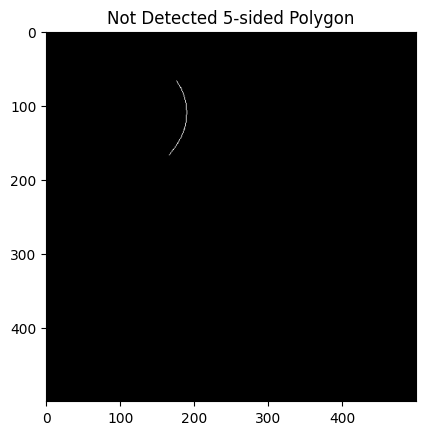

Detected polygon with vertices: None


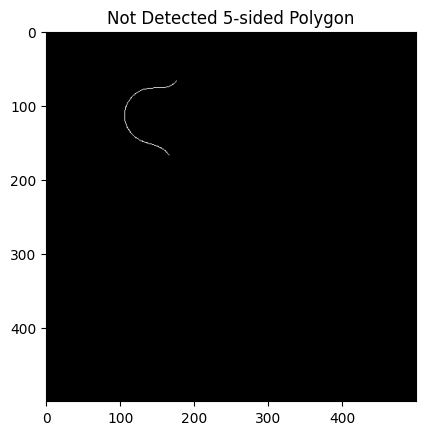

Detected polygon with vertices: None


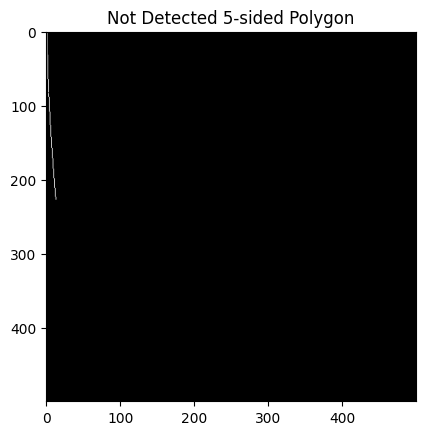

Detected polygon with vertices: None


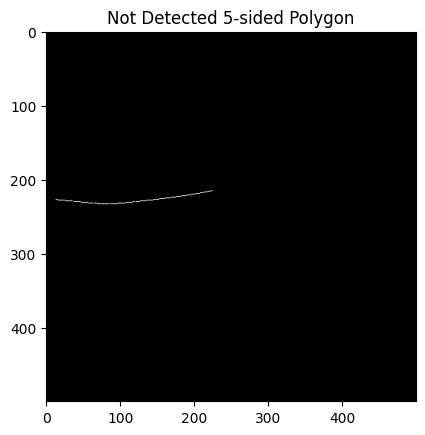

Detected polygon with vertices: None


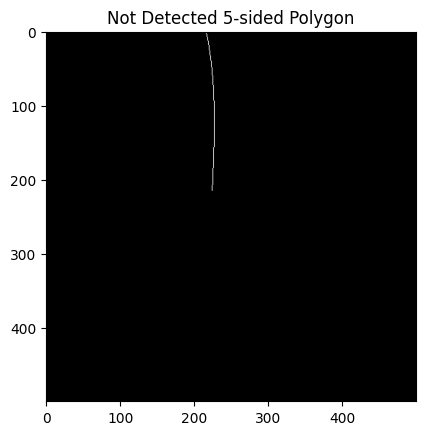

Detected polygon with vertices: None


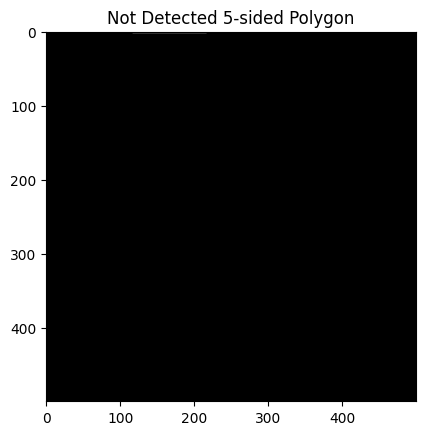

Detected polygon with vertices: None


In [46]:
def fit_polygon(XY, sides, plot=False):
    img = np.zeros((500, 500), dtype=np.uint8)
    for x, y in XY:
        img[int(y), int(x)] = 255
    
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    polygon = None
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == sides:
            polygon = approx
            break
    
    if plot:
        plt.imshow(img, cmap='gray')
        if polygon is not None:
            plt.plot(*zip(*polygon.squeeze()), 'r-', linewidth=2)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.title(f"Detected {sides}-sided Polygon")
        else:
            plt.title(f"Not Detected {sides}-sided Polygon")
        plt.show()

    return polygon

# Example usage
for path in paths_XYs:
    for XY in path:
        polygon = fit_polygon(XY, sides=5, plot=True)  # Example for a pentagon
        print(f"Detected polygon with vertices: {polygon}")


2
94
False
2
166
False
2
171
False
2
91
False
2
109
False
2
103
False
2
226
False
2
166
False
2
215
False
2
14
True


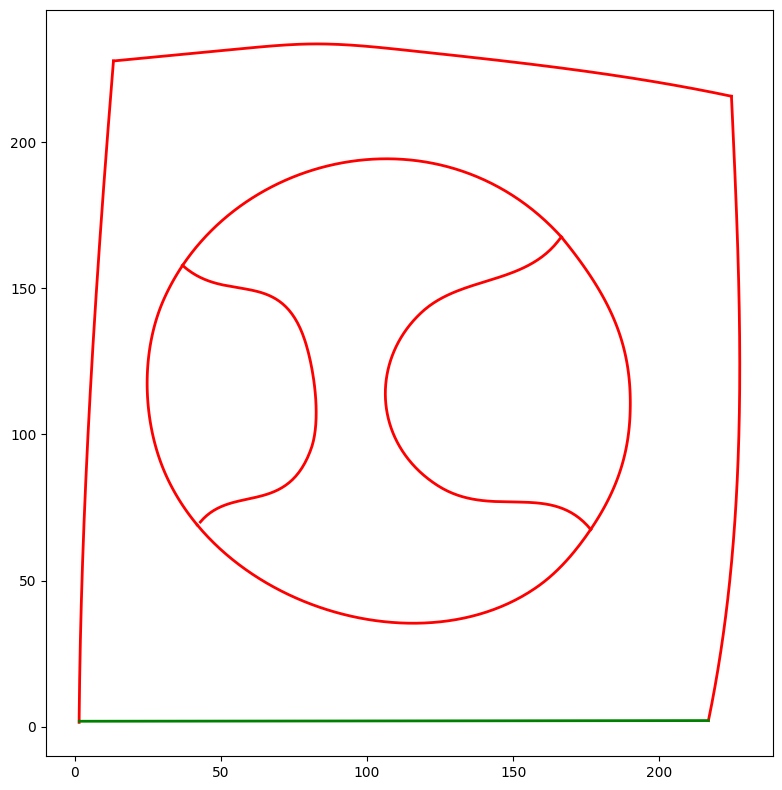

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


def fit_star(XY, plot=False, tolerance=10):
    hull = ConvexHull(XY)
    hull_points = XY[hull.vertices]

    # Calculate distances between consecutive hull points
    distances = np.linalg.norm(np.diff(hull_points, axis=0, append=hull_points[:1]), axis=1)

    # Check if distances alternate between long and short
    long_distances = distances[::2]
    short_distances = distances[1::2] if len(distances) % 2 == 0 else distances[1::2][:-1]

    long_distances_mean = np.mean(long_distances)
    short_distances_mean = np.mean(short_distances)

    alternating = np.all(np.abs(long_distances - long_distances_mean) < tolerance * long_distances_mean) and \
                  np.all(np.abs(short_distances - short_distances_mean) < tolerance * short_distances_mean)

    # Additional check: Angle between points (star points should form sharper angles)
    angles = []
    for i in range(len(hull_points)):
        p1 = hull_points[i - 1]
        p2 = hull_points[i]
        p3 = hull_points[(i + 1) % len(hull_points)]

        v1 = p1 - p2
        v2 = p3 - p2

        angle = np.arccos(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
        angles.append(np.degrees(angle))

    sharp_angles = np.array(angles) < 90
    print(np.sum(sharp_angles))
    print(len(hull_points))
    print(alternating)
    star = alternating or np.sum(sharp_angles) > len(hull_points) // 2

    if plot:
        plt.figure()
        plt.plot(XY[:, 0], XY[:, 1], 'o', label='Data Points')
        if star:
            plt.plot(hull_points[:, 0], hull_points[:, 1], 'green', lw=2, label='Detected Star')
        else:
            plt.plot(hull_points[:, 0], hull_points[:, 1], 'red', lw=2, label='Convex Hull (Not a Star)')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.legend()
        plt.title("Detected Star" if star else "Not a Star")
        plt.show()

    return star


def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=",")
    paths_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        paths_XYs.append(XYs)
    return paths_XYs


def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        for XY in XYs:
            star = fit_star(XY, plot=False)
            color = 'green' if star else 'red'
            ax.plot(XY[:, 0], XY[:, 1], color=color, linewidth=2)
            # if star:
            #     print(f"Shape {i + 1}, points {XY}: Detected Star")
            # else:
            #     print(f"Shape {i + 1}, points {XY}: Not a Star")
    ax.set_aspect("equal")
    plt.show()

# Example usage
csv_path = "./frag0.csv"  # Update with the correct path to your CSV file
paths_XYs = read_csv(csv_path)
plot(paths_XYs)
